In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('../../data_set/2.데이터 클린징/food.csv')
df.head()

,food_a,food_b,food_c
0,20,5,5
1,21,6,5
2,23,11,5
3,22,13,12
4,26,15,10


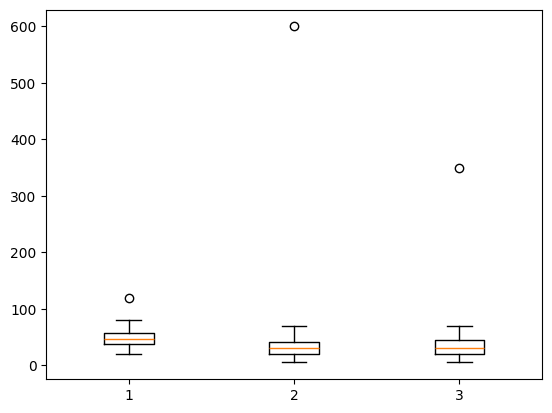

In [4]:
plt.boxplot(df)
plt.show()

In [5]:
df.describe()

,food_a,food_b,food_c
count,27.000000,27.000000,27.000000
mean,47.407407,51.037037,42.407407
std,20.267935,110.789295,64.268822
min,20.000000,5.000000,5.000000
25%,38.000000,20.000000,20.000000
50%,46.000000,30.000000,31.000000
75%,57.000000,41.500000,45.500000
max,120.000000,600.000000,350.000000


In [13]:
for column in df.columns:
    print(column)

food_a
food_b
food_c


In [15]:
lowerfence = []
upperfence = []

for column in df.columns:
    
    iqr = df.describe()[column].loc['75%'] - df.describe()[column].loc['25%']
    upperfence.append(df.describe()[column].loc['75%'] + iqr * 1.5)
    lowerfence.append(df.describe()[column].loc['25%'] - iqr * 1.5)
    
print(lowerfence)
print(upperfence)

[9.5, -12.25, -18.25]
[85.5, 73.75, 83.75]


In [22]:
# food_b 의 이상치 확인하기
dd = df['food_b'][(df['food_b'] < lowerfence[1]) | (df['food_b']> upperfence[1])]
print(dd.index[0])
dd.loc[dd.index[0]]

26


600

In [56]:
for idx, column in enumerate(df.columns):
    
    clean_df = df[column][(df[column] >= lowerfence[idx]) & (df[column] <= upperfence[idx])].to_frame()
    df[column] = clean_df
    

In [59]:
df.dropna(inplace=True)
df

,food_a,food_b,food_c
0,20.0,5.0,5.0
1,21.0,6.0,5.0
2,23.0,11.0,5.0
3,22.0,13.0,12.0
4,26.0,15.0,10.0
6,35.0,20.0,20.0
7,35.0,20.0,20.0
9,42.0,23.0,20.0
10,43.0,22.0,20.0
11,45.0,27.0,21.0


In [61]:
df = pd.read_csv('../../data_set/2.데이터 클린징/food.csv')
df.shape

(27, 3)

In [62]:
for idx, column in enumerate(df.columns):
    
    clean_df = df[column][(df[column] >= lowerfence[idx]) & (df[column] <= upperfence[idx])].to_frame()
    df[column] = clean_df

In [66]:
df.fillna(df.median(), inplace=True)

In [67]:
df

,food_a,food_b,food_c
0,20.0,5.0,5.0
1,21.0,6.0,5.0
2,23.0,11.0,5.0
3,22.0,13.0,12.0
4,26.0,15.0,10.0
5,45.5,16.0,11.0
6,35.0,20.0,20.0
7,35.0,20.0,20.0
8,41.0,21.0,30.5
9,42.0,23.0,20.0
